## Bank Churn Prediction

**Objective:**

Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.


**Context:**
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

**Data Description:**
The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc.

Link to the [Kaggle project](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling) site.


**Points Distribution:**
The points distribution for this case is as follows:
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Distinguish the features and target variable (5 points)
4. Divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10 points)
6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20) 
7. Predict the results using 0.5 as a threshold (10 points)
8. Print the Accuracy score and confusion matrix (5 points)

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Input, optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
print(tf.__version__)

2.3.0


### 1. Read the dataset

In [3]:
data = pd.read_csv('bank.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 2. Feature Elimination
Drop the columns which are unique for all users like IDs (5 points)

In [8]:
# Dropping RowNumber, CustomerId, and Surname and keeping columns from Credit Score to Exited
data = data.iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 3. Bivariate Analysis

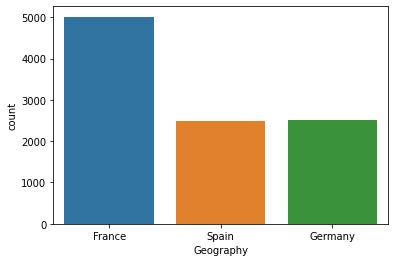

In [9]:
# Customers distribution by Geography
sns.countplot(x="Geography", data=data);

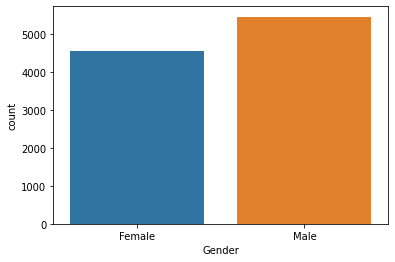

In [10]:
# Customers distribution by Gender
sns.countplot(x="Gender", data=data);

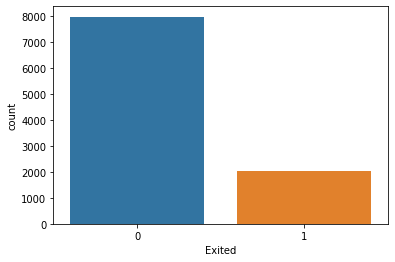

In [11]:
# Distribution of churn
sns.countplot(x="Exited", data=data);

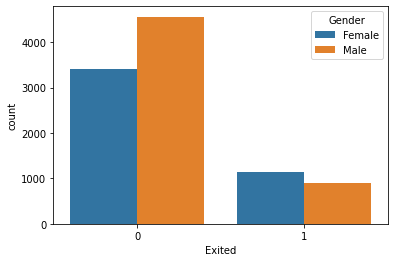

In [12]:
# Distribution of churn by Gender
sns.countplot(x="Exited", hue="Gender", data=data);

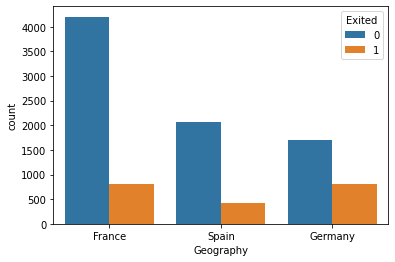

In [13]:
# Distribution of churn by Geography
sns.countplot(x="Geography", hue="Exited", data=data);

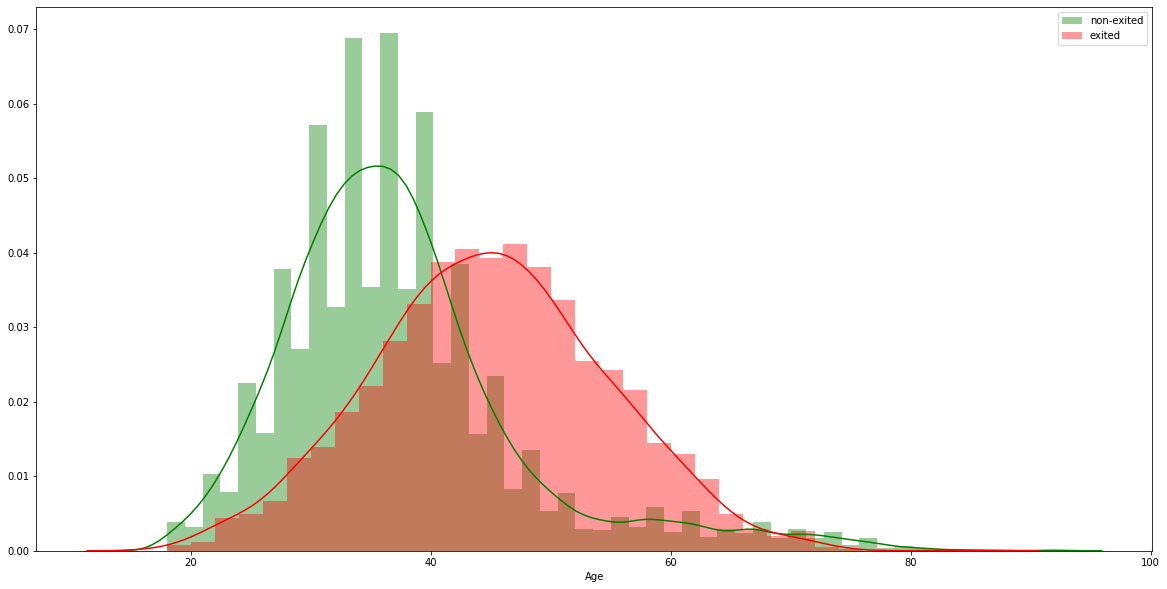

In [14]:
# Distribution of churn by Age
plt.figure(figsize=(20,10))
sns.distplot(data['Age'][data['Exited']==0], color='green', label='non-exited')
sns.distplot(data['Age'][data['Exited']==1], color='red', label='exited')

plt.legend();

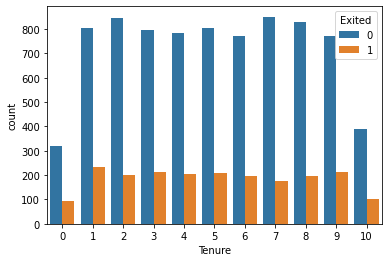

In [15]:
# Distribution of churn by Tenure
sns.countplot(x="Tenure", hue="Exited", data=data);

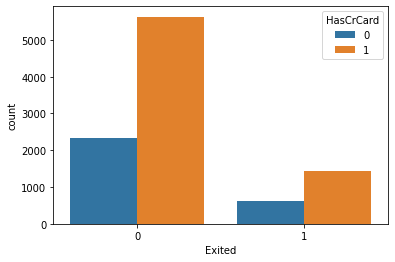

In [16]:
# Distribution of churn by HasCrCard
sns.countplot(x="Exited", hue="HasCrCard", data=data);

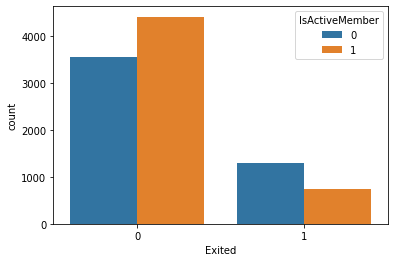

In [17]:
# Distribution of churn by IsActiveMember
sns.countplot(x="Exited", hue="IsActiveMember", data=data);

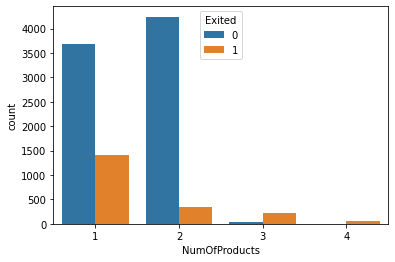

In [18]:
# Distribution of churn by IsActiveMember
sns.countplot(x="NumOfProducts", hue="Exited", data=data);

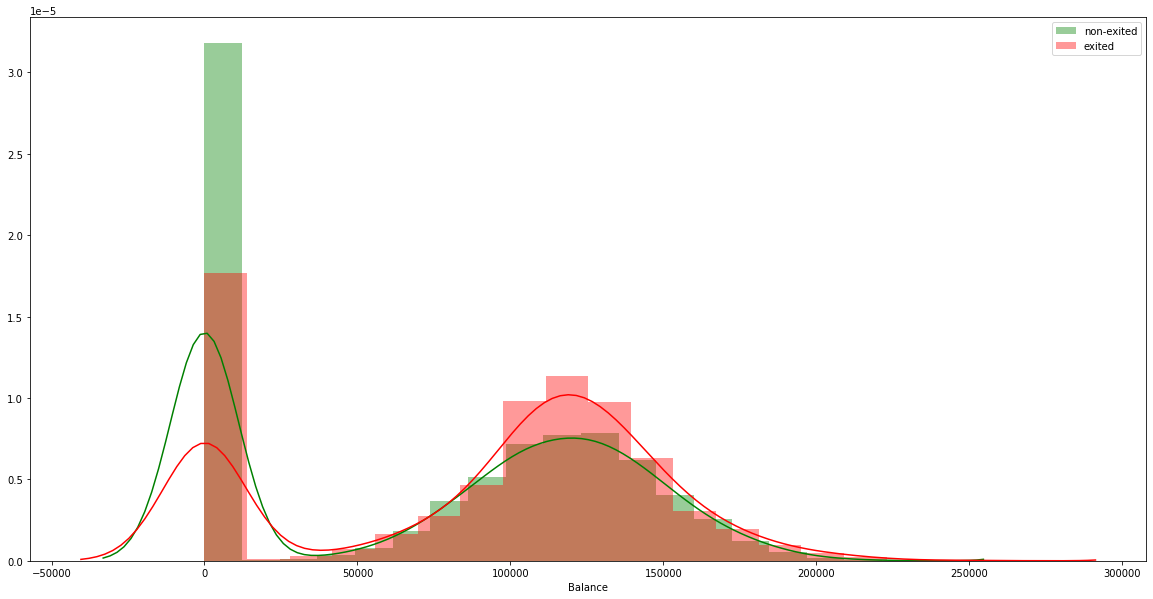

In [19]:
# Distribution of churn by Balance
plt.figure(figsize=(20,10))
sns.distplot(data['Balance'][data['Exited']==0], color='green', label='non-exited')
sns.distplot(data['Balance'][data['Exited']==1], color='red', label='exited')

plt.legend();

Distinguish the features and target variable (5 points)

In [20]:
# Features are columns from Credit Score to Estimated Salary
# Target is Exited
X_data = data.iloc[:,:10]
y_data = data.iloc[:,10]

In [21]:
print(data.shape)
print(X_data.shape)
print(y_data.shape)

(10000, 11)
(10000, 10)
(10000,)


Create one hot encoding to prepare the data for modelling

In [22]:
X_data = pd.get_dummies(X_data)
X_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


### 4. Data Split
Divide the data set into training and test sets (5 points)

In [23]:
# Splitting 80-20
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [24]:
print('X_train:', X_train.shape)
print('X_test :', X_test.shape)
print('y_train:', y_train.shape)
print('y_test :', y_test.shape)

X_train: (8000, 13)
X_test : (2000, 13)
y_train: (8000,)
y_test : (2000,)


### 5. Normalization
Normalize the train and test data (10 points)

In [25]:
# Use StandardScaler to normalize features containing continuous data
scaler=StandardScaler()

# Select features with continuous data
continuous_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X_train[continuous_features]

# Fit
scaler.fit(X_train[continuous_features])

# Transform
X_train_scaled=scaler.transform(X_train[continuous_features])
X_test_scaled=scaler.transform(X_test[continuous_features])


# Update continuous data in X_train with new scaled data
X_train[continuous_features] = X_train_scaled
X_test[continuous_features] = X_test_scaled

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [26]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4989,-0.224828,0.099845,1.377789,-1.234331,-0.906787,1,0,-1.736747,1,0,0,0,1
4498,-0.835785,-0.848578,-1.037266,0.874085,-0.906787,1,1,-0.905804,1,0,0,0,1
8876,-0.980758,0.668899,-0.692259,0.879836,-0.906787,1,1,0.145744,0,0,1,0,1
670,-0.276604,0.858584,-0.692259,0.729389,0.808987,0,0,-1.217237,0,1,0,1,0
9552,0.137604,0.194688,-0.002243,-1.234331,-0.906787,1,1,0.902146,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-1.022179,0.574057,1.377789,-1.234331,0.808987,1,0,-1.273985,0,0,1,0,1
4307,1.235256,0.668899,1.377789,1.825095,-0.906787,1,1,-1.482863,0,0,1,0,1
5699,0.344708,-0.374367,0.342765,0.945725,-0.906787,1,1,-0.223850,1,0,0,0,1
537,0.365418,-0.469209,1.377789,-1.234331,0.808987,1,0,0.476920,0,0,1,0,1


In [27]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1977,0.686430,-0.374367,-1.382274,-1.234331,2.524761,0,0,1.296654,0,0,1,0,1
3880,0.272222,3.134801,1.032781,-1.234331,0.808987,1,1,0.929066,1,0,0,1,0
52,1.421649,-0.564051,-0.002243,-1.234331,0.808987,0,0,0.292974,1,0,0,1,0
2551,-1.177507,1.332796,-0.692259,-1.234331,-0.906787,1,1,-0.151130,1,0,0,1,0
2246,0.686430,0.005003,0.342765,-1.234331,0.808987,1,0,-0.118671,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,0.002986,-1.038263,1.722797,0.042256,-0.906787,1,1,-0.441495,1,0,0,0,1
2836,0.292932,1.996693,1.032781,-1.234331,0.808987,1,1,-0.846262,1,0,0,0,1
1169,0.023697,-0.089839,1.032781,0.404397,-0.906787,1,1,1.153389,1,0,0,1,0
9929,1.079927,-0.089839,-0.347251,0.548217,-0.906787,1,1,-1.395375,0,1,0,0,1


In [28]:
# Convert Data into Numpy arrays
X_train_array=np.array(X_train)
X_test_array=np.array(X_test)
y_train_array=np.array(y_train)
y_test_array=np.array(y_test)

### 6. Modelling
Initialize & build the model. Identify the points of improvement and implement the same the same. (20) 

In [29]:
# Initialize Sequential model
model = Sequential()

# Add Input layer to the model
model.add(Input(shape=(13,))) # 13 Features

# Hidden layers and Batch Normalization and Dropout
model.add(Dense(13, kernel_initializer='he_normal', bias_initializer='Ones', activation='relu', name='Layer_1'))
model.add(BatchNormalization())
model.add(Dense(13, kernel_initializer='he_normal', bias_initializer='Ones', activation='relu', name='Layer_2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, kernel_initializer='he_normal', bias_initializer='Ones', activation='relu', name='Layer_3'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid', name='Output'))

In [30]:
# Initialize the optimizer
sgd = optimizers.Adam(lr = 0.001)

In [31]:
# Compile the model
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [32]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
Layer_2 (Dense)              (None, 13)                182       
_________________________________________________________________
batch_normalization_1 (Batch (None, 13)                52        
_________________________________________________________________
dropout (Dropout)            (None, 13)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0

In [33]:
# Model Training
history = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array),
          epochs=200, batch_size = 32, verbose = 1)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
235/250 [===========================>..] - ETA: 0s - loss: 0.6831 - accuracy: 0.7082WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9dfcb3a3b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

Epoch 45/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8414 - val_loss: 0.3504 - val_accuracy: 0.8520
Epoch 46/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8447 - val_loss: 0.3502 - val_accuracy: 0.8605
Epoch 47/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8426 - val_loss: 0.3497 - val_accuracy: 0.8590
Epoch 48/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8454 - val_loss: 0.3488 - val_accuracy: 0.8595
Epoch 49/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8418 - val_loss: 0.3469 - val_accuracy: 0.8560
Epoch 50/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8438 - val_loss: 0.3506 - val_accuracy: 0.8575
Epoch 51/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8476 - val_loss: 0.3493 - val_accuracy:

Epoch 102/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8474 - val_loss: 0.3436 - val_accuracy: 0.8590
Epoch 103/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8429 - val_loss: 0.3442 - val_accuracy: 0.8590
Epoch 104/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8482 - val_loss: 0.3441 - val_accuracy: 0.8565
Epoch 105/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8481 - val_loss: 0.3431 - val_accuracy: 0.8600
Epoch 106/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3606 - accuracy: 0.8485 - val_loss: 0.3432 - val_accuracy: 0.8585
Epoch 107/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8503 - val_loss: 0.3451 - val_accuracy: 0.8620
Epoch 108/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8490 - val_loss: 0.3439 - val_ac

250/250 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8471 - val_loss: 0.3415 - val_accuracy: 0.8570
Epoch 159/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8504 - val_loss: 0.3414 - val_accuracy: 0.8565
Epoch 160/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8521 - val_loss: 0.3402 - val_accuracy: 0.8565
Epoch 161/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8462 - val_loss: 0.3431 - val_accuracy: 0.8550
Epoch 162/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8514 - val_loss: 0.3436 - val_accuracy: 0.8610
Epoch 163/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8484 - val_loss: 0.3430 - val_accuracy: 0.8565
Epoch 164/200
250/250 [==============================] - ETA: 0s - loss: 0.3579 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8475

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


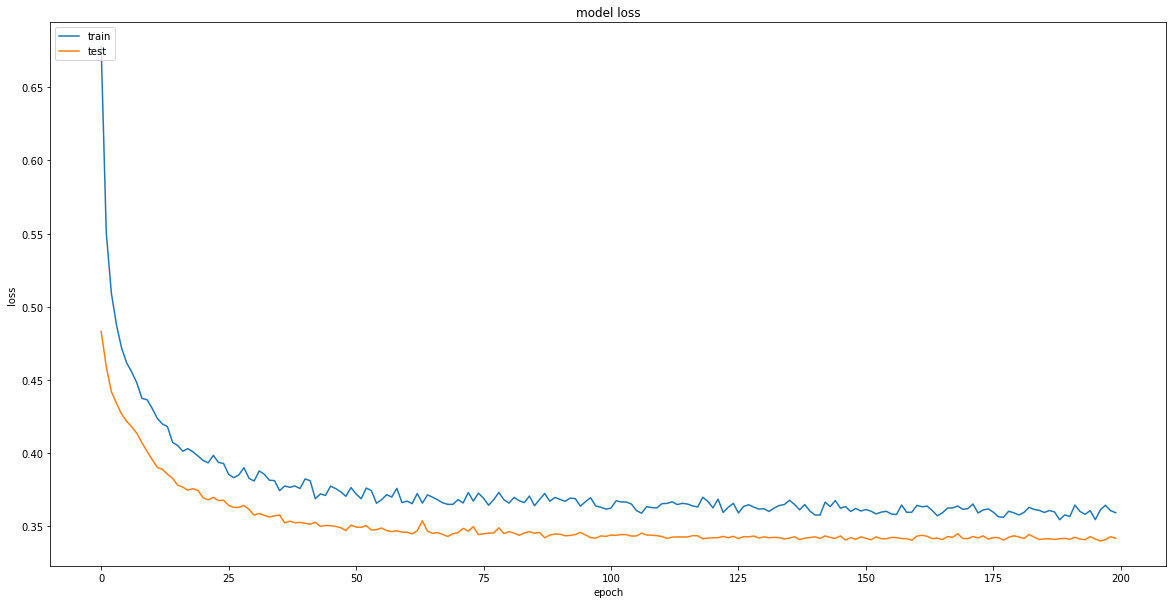

In [35]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

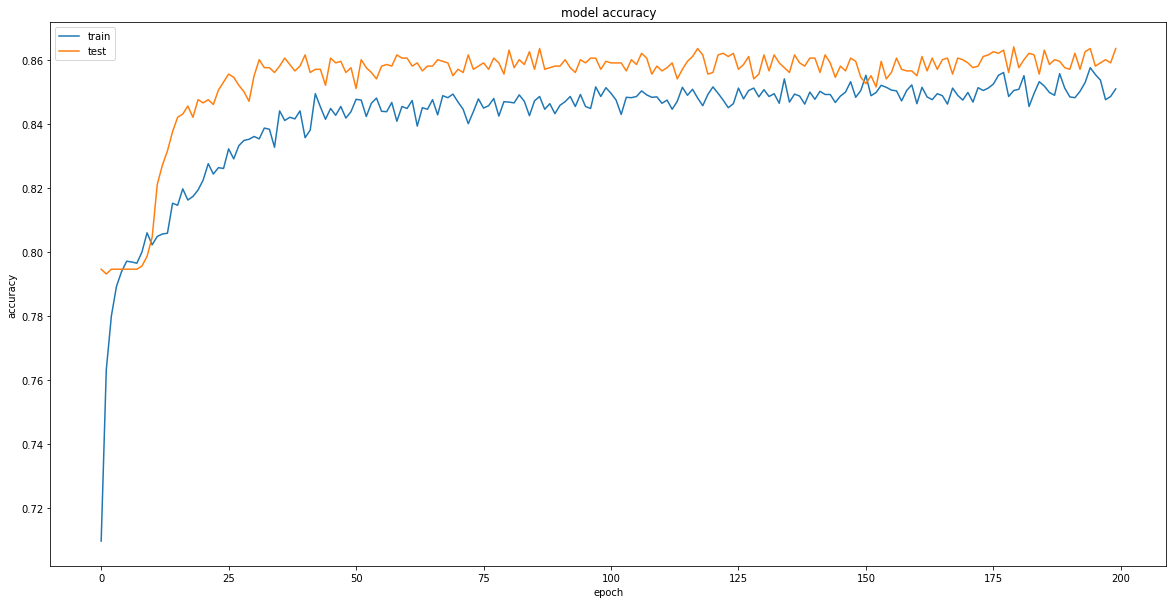

In [36]:
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7. Prediction at 0.5 Threshold
Predict the results using 0.5 as a threshold (10 points)

In [37]:
# Predicts gives the probability of each customer to churn or not
model.predict(X_test_array)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.66837215],
       [0.06635135],
       [0.03484532],
       ...,
       [0.16730258],
       [0.2860322 ],
       [0.06151158]], dtype=float32)

In [38]:
# This approach can set 0 or 1 for each class based on a predefined threshold
threshold=0.5
y_test_preds = np.where(model.predict(X_test_array) > threshold, 1, 0)
y_test_preds

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [39]:
# Alternatively, predict_classes by default has a threshold of 0.5
y_pred_cls = model.predict_classes(X_test_array, batch_size=32, verbose=1)
y_pred_cls

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

### 8. Model Performance Evaluation
Print the Accuracy score and confusion matrix (5 points)

In [40]:
model.evaluate(X_test,y_test_array)

63/63 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8635


[0.34166136384010315, 0.8634999990463257]

In [41]:
print('Test Metrics at 0.5 Threshold with ANN model\n')
Test_Metrics=pd.DataFrame(data=[
    accuracy_score(y_test, y_test_preds),
    recall_score(y_test, y_test_preds),
    precision_score(y_test, y_test_preds),
    f1_score(y_test, y_test_preds)],
                          columns=['ANN'],
                          index=["accuracy", "recall", "precision", "f1_score"]
                         )
Test_Metrics
#print(Test_Metrics)

Test Metrics at 0.5 Threshold with ANN model



,ANN
accuracy,0.863500
recall,0.450122
precision,0.797414
f1_score,0.575428


Given the problem statement, the cost of false negatives (i.e. improperly identifying a client as not likely to churn) is higher than false positives (i.e. improperly classifying a client to churn). Therefore, this case is about minimizing recall. 

In [42]:
confusion_matrix(y_test_array, y_test_preds)

array([[1542,   47],
       [ 226,  185]])

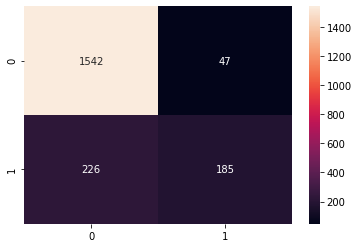

In [43]:
cm=confusion_matrix(y_test_array, y_test_preds)
sns.heatmap(cm, annot=True,fmt='d');